In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
from utils import plot_2d, plot_classifier_boundary, test_model
from sklearn.model_selection import GridSearchCV

# LINEAR performing better

As Radial Basis Kernel is very powerful and is basically a go-to solution when it comes to dealing with complicated data, it was very hard to create a dataset, which would be classified with higher accuracy by a Support Vector Classifier using linear kernel. After doing some internet research it turned out that there is a possibility that datasets, which have a [large number of features](https://stackoverflow.com/questions/20566869/where-is-it-best-to-use-svm-with-linear-kernel) might be better classified by linear kernel, because of high number of dimenentions and no need of mapping the dataset to a higher dimention. It was also noted that [unbalanced datasets](https://stats.stackexchange.com/questions/408196/can-we-get-resonable-classificaion-if-we-use-rbf-kernel-for-linearly-sepable-dat) may be a good fit for a linear kernel, because rbf kernel might fail to reach convergence.

In [2]:
def G_SVC_lin(): # generating data for a better linear kernel performance

 
    X, y = datasets.make_blobs(
        n_samples=[100, 5000], 
        centers=[(3,5),(6,5)],             
        n_features=1736, 
        cluster_std=[0.5, 1],
        random_state=42, 
        shuffle=False)


    return X, y

In [3]:
X_lin, y_lin = G_SVC_lin()
X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=.33, random_state=42)

In [4]:
# parameter tuning for linear kernel


param_grid_lin = {'C': [0.001,0.01,0.1,1.,5,10,15,20,30, 40, 50, 60,70,80,90,100],
                  'kernel': ['linear']}


grid_lin = GridSearchCV(SVC(), param_grid_lin)
grid_lin.fit(X_train, y_train);

In [5]:
# parameter tuning for rbf kernel

param_grid_rbf = {'C': [0.001,0.01,0.1,1.,5,10,15,20,30, 40, 50, 60,70,80,90,100],
                  'kernel': ['rbf'],
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 3, 5, 7, 10]}


grid_rbf = GridSearchCV(SVC(), param_grid_rbf)
grid_rbf.fit(X_train, y_train);

In [6]:
model_linear = SVC(kernel='linear',
                   C=grid_lin.best_params_['C'],
                   random_state=42)

model_rbf = SVC(kernel='rbf',
                C=grid_rbf.best_params_['C'],
                gamma=grid_rbf.best_params_['gamma'],
                random_state=42)

AUC score: 0.903


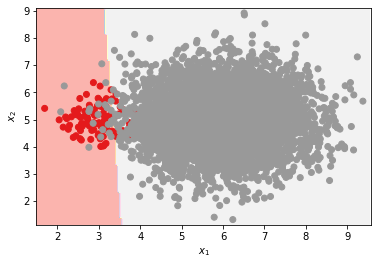

In [7]:
test_model(model_linear, X_lin, y_lin, n_tests=100)

AUC score: 0.896


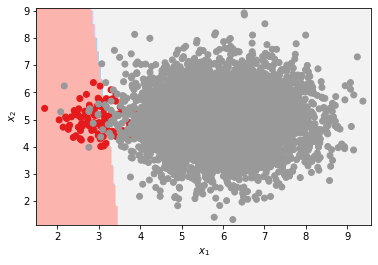

In [8]:
test_model(model_rbf, X_lin, y_lin, n_tests=100)

Test has been done 100 times since the margin in accuracy is really small, nevertheless it tends to be better with the linear kernel.

# RBF performing better

Creating a dataset, which would be classified better by a RBF kernel was actually a pretty easy task, because of the limitations that linear kernel faces. In 2D (2 features) and with data that is linearly non-separable it would perform very poorly. On the other hand the RBF kernel easily maps 2D data into higher dimention and classifies it with high accuracy.

In [18]:
def G_SVC_RBF(): # generating data for a better rbf kernel performance
    
    X, y = datasets.make_circles(n_samples=1000,
                                 noise=0.2,
                                 factor=0.2,
                                 random_state=42)
    
    return X, y

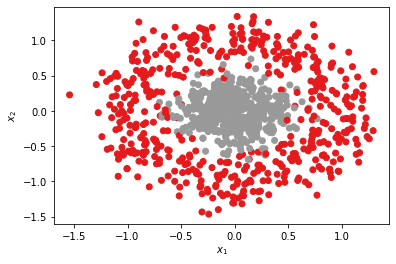

In [19]:
X_rbf, y_rbf = G_SVC_RBF()
X_train, X_test, y_train, y_test = train_test_split(X_rbf,
                                                    y_rbf,
                                                    test_size=.33,
                                                    random_state=42)

plot_2d(X_rbf, y_rbf)

In [20]:
#parameter tuning for linear kernel

param_grid_lin = {'C': [0.001,0.01,0.1,1.,5,10,15,20,30, 40, 50, 60,70,80,90,100],
                  'kernel': ['linear']}


grid_lin = GridSearchCV(SVC(), param_grid_lin)
grid_lin.fit(X_train, y_train);

In [21]:
#parameter tuning for rbf kernel

param_grid_rbf = {'C': [0.001,0.01,0.1,1.,5,10,15,20,30, 40, 50, 60,70,80,90,100],
                  'kernel': ['rbf'],
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 3, 5, 7, 10]}


grid_rbf = GridSearchCV(SVC(), param_grid_rbf)
grid_rbf.fit(X_train, y_train);

In [22]:
model_linear = SVC(kernel='linear',
                   C=grid_lin.best_params_['C'],
                   random_state=42)

model_rbf = SVC(kernel='rbf',
                C=grid_rbf.best_params_['C'],
                gamma=grid_rbf.best_params_['gamma'],
                random_state=42)

AUC score: 0.535


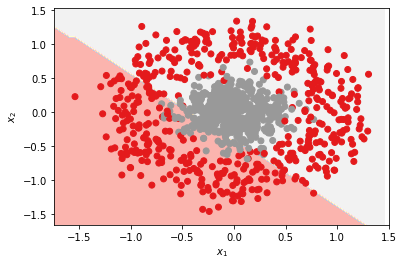

In [23]:
test_model(model_linear, X_rbf, y_rbf)

AUC score: 0.963


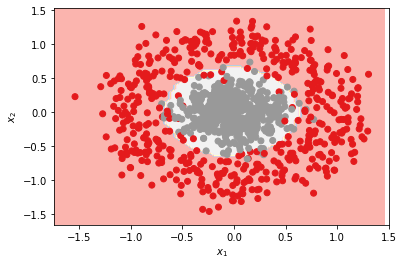

In [15]:
test_model(model_rbf, X_rbf, y_rbf)